# CNN

In [23]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
import random
import numpy as np

In [24]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

In [25]:
mnist = tf.keras.datasets.mnist

In [26]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [27]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [28]:
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


In [29]:
x_train = x_train.reshape((-1,28,28,1))
x_test = x_test.reshape((-1,28,28,1))

In [30]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [31]:
cnnModel = models.Sequential()

cnnModel.add(layers.Conv2D(10,(3,3), activation = "relu", input_shape = (28,28,1)))
cnnModel.add(layers.MaxPooling2D((2,2)))

cnnModel.add(layers.Conv2D(64,(3,3), activation = "relu"))
cnnModel.add(layers.MaxPooling2D((2,2)))

cnnModel.add(layers.Conv2D(64,(3,3), activation = "relu"))
cnnModel.add(layers.Flatten())

cnnModel.add(layers.Dense(64, activation= "relu"))
cnnModel.add(layers.Dense(32, activation= "relu"))
cnnModel.add(layers.Dense(10, activation= "softmax"))

cnnModel.summary()

cnnModel.compile(optimizer = "adam", loss = "categorical_crossentropy",metrics= ["accuracy"])

cnnModel.fit(x_train,y_train, epochs= 20, batch_size = 32)

testLoss, testAccuracy = cnnModel.evaluate(x_test,y_test)
print(testAccuracy)

cnnModel.save('./my_model')
cnnModel.save_weights('./my_checkpoint')

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 13, 13, 10)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 11, 11, 64)        5824      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 64)               

In [35]:
print(cnnModel.predict_classes(x_test[:1]))

[7]


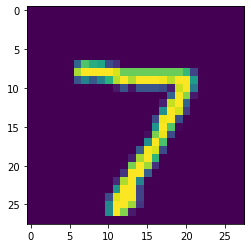

In [36]:
from matplotlib import pyplot as plt 
plt.imshow(x_test[0].reshape((28,28)))
plt.show([0])